# Deep Learning Using Keras

## Imports

In [15]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

### Loading dataset

In [16]:
dataset = keras.datasets.fashion_mnist
((traine_picture, traine_id), (test_picture, test_id)) = dataset.load_data()


### Data exploration

In [17]:
len(traine_picture)
traine_picture.shape
test_picture.shape
len(test_id)
traine_id.min()
traine_id.max()

9

### Data exhibition

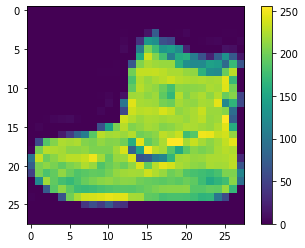

In [4]:
total_of_kinds = 10
name_of_kinds = ['T-shirt', 'Pants', 'Pullover',
                            'Dress', 'Coat', 'Sandal', 'Shirt',
                            'Tennis', 'Bag', 'Boot']
plt.imshow(traine_picture[0])
plt.colorbar()

### Normalizing the pictures

In [5]:
traine_picture = traine_picture/float(255)

### Creat, compiling, training and normalizing the model

In [6]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historic = model.fit(traine_picture, traine_id, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5278 - accuracy: 0.8138 - val_loss: 0.4178 - val_accuracy: 0.8499
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8549 - val_loss: 0.3743 - val_accuracy: 0.8647
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3645 - accuracy: 0.8657 - val_loss: 0.3569 - val_accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3377 - accuracy: 0.8746 - val_loss: 0.3441 - val_accuracy: 0.8776
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3212 - accuracy: 0.8807 - val_loss: 0.3407 - val_accuracy: 0.8773


### Saving and loading the model

In [8]:
model.save('model.h5')
model_save = load_model('model.h5')

### Viewing training and validation accuracy by season

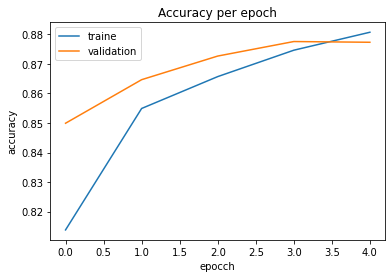

In [9]:
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])
plt.title('Accuracy per epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['traine', 'validation'])


### Viewing training losses and validation by season

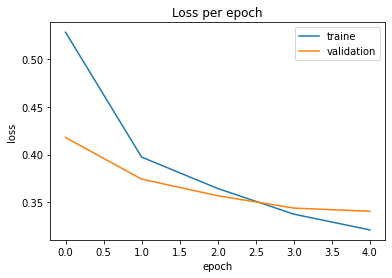

In [10]:
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])
plt.title('Loss per epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['traine', 'validation'])

### Testing the model and the saved model

In [11]:
tests = model.predict(test_picture)
print('test result:', np.argmax(tests[1]))
print('número da imagem de teste:', test_id[1])

test_model_save = model_save.predict(test_picture)
print('resultado teste modelo salvo:', np.argmax(test_model_save[1]))
print('número da imagem de teste:', test_id[1])

test result: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


### Evaluating the model

In [14]:
test_loss, test_accuracy = model.evaluate(test_picture, test_id)
print('Perda do teste:', test_loss)
print('Acurácia do teste:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 54.9504 - accuracy: 0.8544
Perda do teste: 54.95041275024414
Acurácia do teste: 0.8543999791145325
